# Investigating Netflix Movies

### Project Instructions

- Perform exploratory data analysis on the netflix_data.csv data to understand more about movies from the 1990s decade.

- What was the most frequent movie duration in the 1990s? Save an approximate answer as an integer called duration (use 1990 as the decade's start year).

- A movie is considered short if it is less than 90 minutes. Count the number of short action movies released in the 1990s and save this integer as short_movie_count.

_Feel free to experiment after submitting the project!_

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# The netflix_titles database has a larger set and sorted already.

# Read in the Netflix CSV as a DataFrame (Uncomment by removing #) 
#netflix_df = pd.read_csv('../DataCamp/Databases/netflix_titles.csv')

# Read in the Netflix CSV as a DataFrame
netflix_df = pd.read_csv('../DataCamp/Databases/netflix_data.csv')

# First, we do a little investigation
print(netflix_df.shape)          # Shows how many rows & columns in the DataFrame

netflix_df.head()                # Prints out first 5 rows of the DataFrame

(7787, 11)


,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,4,In a future where the elite inhabit an island ...,International TV
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas


In [10]:
# Count the number of unique types of shows in the data and display the type names
show_types = netflix_df['type'].value_counts()
num_show_types = netflix_df['type'].nunique()
show_types, num_show_types

(type
 Movie      5377
 TV Show    2410
 Name: count, dtype: int64,
 2)

In [8]:
# Chooses the "Movie" type rows in the dataframe.
netflix_df_movies_only = netflix_df[netflix_df['type'] == 'Movie']

# We select only the columns of interest
netflix_movies_col_subset = netflix_df_movies_only[['title', 'country', 'genre', 'release_year', 'duration']]

# Print the first five rows of the new DataFrame
netflix_movies_col_subset.head()

,title,country,genre,release_year,duration
1,7:19,Mexico,Dramas,2016,93
2,23:59,Singapore,Horror Movies,2011,78
3,9,United States,Action,2009,80
4,21,United States,Dramas,2008,123
6,122,Egypt,Horror Movies,2019,95


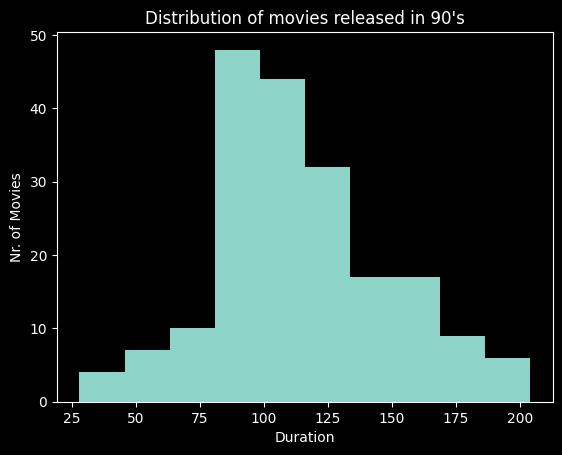

There are 194 movies released in 90's.
Most frequent movie duration: 94 minutes.


In [9]:
# Chooses the "Movie" type rows in the dataframe.
netflix_df_movie = netflix_df[netflix_df['type'] == 'Movie']

# Filter the movies released between 1990 & 1999
netflix_nineties = netflix_df_movie[(netflix_df_movie['release_year'] <=1999) & (netflix_df_movie['release_year'] >= 1990)]

plt.hist(netflix_nineties['duration'], ec='blue', lw=0.5)  # ec stands for edgecolor, lw stands for linewidth.
plt.xlabel('Duration')
plt.ylabel('Nr. of Movies')
plt.title("Distribution of movies released in 90's")
plt.show()

nr_of_nineties = netflix_nineties.shape[0]   # Gives the number of rows in DataFrame.
print("There are " + str(nr_of_nineties) + " movies released in 90's.")

# Most frequent movie duration, with mode() function
duration = netflix_nineties['duration'].mode()[0]
print('Most frequent movie duration: ' + str(duration) + ' minutes.')

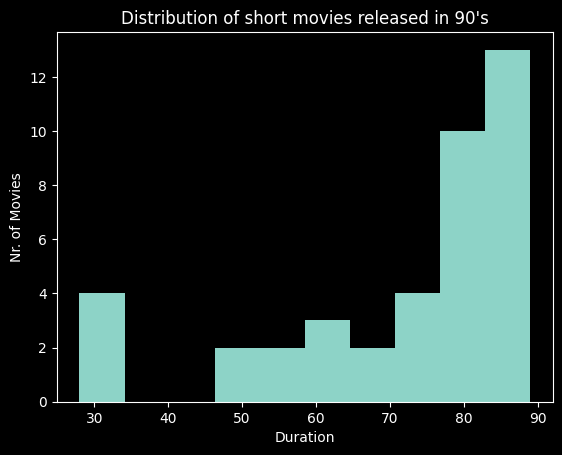

There are 40 short movies released in 90's.


In [10]:
# Visualize the duration column of your filtered data to see the distribution of movie durations
# See which bar is the highest and save the duration value, this doesn't need to be exact!
netflix_nineties_short = netflix_nineties[netflix_nineties['duration'] < 90]

plt.hist(netflix_nineties_short['duration'], ec='blue', lw=0.5) 
plt.xlabel('Duration')
plt.ylabel('Nr. of Movies')
plt.title("Distribution of short movies released in 90's")
plt.show()

nr_of_short = netflix_nineties_short.shape[0]
print("There are " + str(nr_of_short) + " short movies released in 90's.")

In [11]:
# Filter the "Action" genre in the short movies DataFrame
netflix_nineties_short_action = netflix_nineties_short[netflix_nineties_short['genre'] == 'Action']
short_movie_count = netflix_nineties_short_action.shape[0]

print('There are ' + str(short_movie_count) + " short action movies released in 90's.")

# Most frequent movie duration, with mode() function
duration_short = netflix_nineties_short_action['duration'].mode()[0]
print('Most frequent short movie duration: ' + str(duration_short) + ' minutes.')

There are 8 short action movies released in 90's.
Most frequent short movie duration: 89 minutes.


### Below is the solution of Datacamp AI.

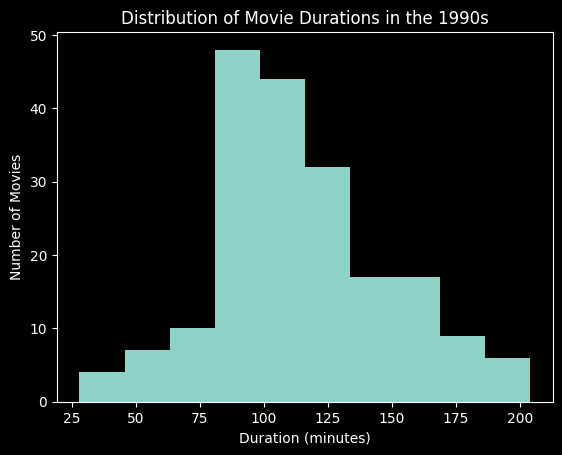

8


In [ ]:
# Importing pandas and matplotlib
import pandas as pd
import matplotlib.pyplot as plt

# Read in the Netflix CSV as a DataFrame
netflix_df = pd.read_csv("../DataCamp/Databases/netflix_data.csv")

# Subset the DataFrame for type "Movie"
netflix_subset = netflix_df[netflix_df["type"] == "Movie"]

# Filter the to keep only movies released in the 1990s
# Start by filtering out movies that were released before 1990
subset = netflix_subset[(netflix_subset["release_year"] >= 1990)]

# And then do the same to filter out movies released on or after 2000
movies_1990s = subset[(subset["release_year"] < 2000)]

# Another way to do this step is to use the & operator which allows you to do this type of filtering in one step
# movies_1990s = netflix_subset[(netflix_subset["release_year"] >= 1990) & (netflix_subset["release_year"] < 2000)]

# Visualize the duration column of your filtered data to see the distribution of movie durations
# See which bar is the highest and save the duration value, this doesn't need to be exact!
plt.hist(movies_1990s["duration"])
plt.title('Distribution of Movie Durations in the 1990s')
plt.xlabel('Duration (minutes)')
plt.ylabel('Number of Movies')
plt.show()

duration = 100

# Filter the data again to keep only the Action movies
action_movies_1990s = movies_1990s[movies_1990s["genre"] == "Action"]

# Use a for loop and a counter to count how many short action movies there were in the 1990s

# Start the counter
short_movie_count = 0

# Iterate over the labels and rows of the DataFrame and check if the duration is less than 90, if it is, add 1 to the counter, if it isn't, the counter should remain the same
for label, row in action_movies_1990s.iterrows() :
    if row["duration"] < 90 :
        short_movie_count = short_movie_count + 1
    else:
        short_movie_count = short_movie_count

print(short_movie_count)

# A quicker way of counting values in a column is to use .sum() on the desired column
# (action_movies_1990s["duration"] < 90).sum()